# Title: Forecasting Model for Kalbe.ipynb

# Intro

Name: Wenny Chandra Sari

Graduate of: Full Stack Data Science Hacktiv8 Batch 16 on December 23th, 2022.

About me:

Hi! ✨✨

My name is Wenny Chandra Sari. I'm a graduated Full Stack Data Scientist from Hacktiv8 Bootcamp. I learnt Big Data, Data Analytics, Machine Learning, Artificial Intelligence, and Data Engineering in the bootcamp using Python, Numpy, Pandas, Matplotlib, Streamlit, Scikit-learn, Keras, Tensorflow, SQL, Pyspark, Docker, Looker data studio, Visual Studio Code, and Google Collab. You can read my project through links in my CV.

I also have experiences in business and legal field that shape my flexibility, courage, and sharpness. Besides, I had joined a public speaking and leadership club since 2016 and served as a secretary there for a year that improve my speaking and collaboration capabilities.

Other characters that I have are optimistic, quick learner, eager to learn new things, hard worker, refuse stagnation, and share skills.

Thank you for your time ✨✨

# External Link

Deployment/Tableau/Data Studio/Streamlit any other link:

PPT(15 slides):

Elevator Pitch:

# Working Area

## 1. Import Lib

In [382]:
# python lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# lib untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# menyimpan model
import joblib
import json

# statistik & model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [240]:
# stats
from scipy.stats import stats
from scipy import stats

In [241]:
# setup syntax
pd.set_option('display.max_columns', None)

## 2. Data Loading

Data berupa berformat xlsx atau excel yang telah diberikan sebelumnya dan didownload oleh siswa.

In [242]:
# load dataset
data_A1 = pd.read_excel('kalbe_data.xlsx', sheet_name="A1")
data_A2 = pd.read_excel('kalbe_data.xlsx', sheet_name="A2")
data_B1 = pd.read_excel('kalbe_data.xlsx', sheet_name="B1")
data_B2 = pd.read_excel('kalbe_data.xlsx', sheet_name="B2")

# menduplikat dataset
data_A1_co = data_A1.copy()
data_A2_co = data_A2.copy()
data_B1_co = data_B1.copy()
data_B2_co = data_B2.copy()

# concat dataset per kategori
data_A = [data_A1, data_A2]
data_B = [data_B1, data_B2]
data_A = pd.concat(data_A)
data_B = pd.concat(data_B)

# menduplikat dataset per kategori
data_A_co = data_A.copy()
data_B_co = data_B.copy()

In [243]:
# melihat data A1
data_A1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [244]:
# melihat data A2
data_A2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


In [245]:
# melihat data B1
data_B1.head()

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0


In [246]:
# melihat data B2
data_B2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


In [247]:
# melihat info data A1
data_A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [248]:
# melihat info data A2
data_A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [249]:
# melihat info data B1
data_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [250]:
# melihat info data B2
data_B2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


In [251]:
# melihat jumlah null di data A2
data_A2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [252]:
# melihat jumlah null di data B1
data_B1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

In [253]:
# melihat jumlah null di data B2
data_B2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

In [254]:
# melihat variasi (unique) dari data A1
data_A1.nunique()

Day         90
Category     1
Product      1
Sales       85
dtype: int64

In [255]:
# melihat variasi (unique) dari data A2
data_A2.nunique()

Day         90
Category     1
Product      1
Sales       90
dtype: int64

In [256]:
# melihat variasi (unique) dari data B1
data_B1.nunique()

Day         104
Category      1
Product       1
Sales        16
Event         2
dtype: int64

In [257]:
# melihat variasi (unique) dari data B2
data_B2.nunique()

Day         104
Category      1
Product       1
Sales        30
dtype: int64

In [258]:
# melihat deskripsi data_A1
data_A1.describe()

,Day,Sales
count,90.000000,90.000000
mean,45.500000,150.819298
std,26.124701,31.200698
min,1.000000,100.000000
25%,23.250000,122.718030
50%,45.500000,149.696822
75%,67.750000,178.000000
max,90.000000,210.000000


In [259]:
# melihat deskripsi data_A2
data_A2.describe()

,Day,Sales
count,90.000000,90.000000
mean,45.500000,1265.010398
std,26.124701,164.440471
min,1.000000,1000.000000
25%,23.250000,1122.953956
50%,45.500000,1254.749873
75%,67.750000,1402.011887
max,90.000000,1558.760875


In [260]:
# melihat deskripsi data_B1
data_B1.describe()

,Day,Sales,Event
count,104.000000,90.000000,104.000000
mean,52.500000,1063.055556,0.115385
std,30.166206,197.696872,0.321033
min,1.000000,970.000000,0.000000
25%,26.750000,980.000000,0.000000
50%,52.500000,1000.000000,0.000000
75%,78.250000,1010.000000,0.000000
max,104.000000,1734.000000,1.000000


In [261]:
# melihat deskripsi data_B2
data_B2.describe()

,Day,Sales
count,104.000000,30.000000
mean,52.500000,2761.875726
std,30.166206,2055.025674
min,1.000000,10.000000
25%,26.750000,477.500000
50%,52.500000,3440.880000
75%,78.250000,4776.628424
max,104.000000,4980.657414


Pengamatan dilakukan dari file xlsx dan jupither notebook.

Hasil pengamatan:
- Data A1 terdiri dari 90 baris dan 4 kolom, hari ke 1 s/d ke 90, categori A, produk A1, sales minimum adalah 100 dan sales maksimum adalah 210, tidak ada data kosong.
- Data A2 terdiri dari 90 baris dan 4 kolom, hari ke 1 s/d ke 90, categori A, produk A2, sales minimum adalah 1000 dan sales maksimum adalah 1559, tidak ada data kosong.
- Data B1 terdiri dari 104 baris dan 5 kolom, hari ke 1 s/d ke 104, categori B, produk B1, ada atau tidak ada event, sales minimum adalah 970 dan sales maksimum adalah 1734, terdapat 14 data kosong di bagian sales.
- Data B2 terdiri dari hari ke 1 s/d ke 104, categori B, produk B2, sales minimum adalah 10 dan sales maksimum adalah 4980, terdapat 74 data kosong di bagian sales.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Kategori A1

In [262]:
# menampilkan tabel 5 data teratas
data_A1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


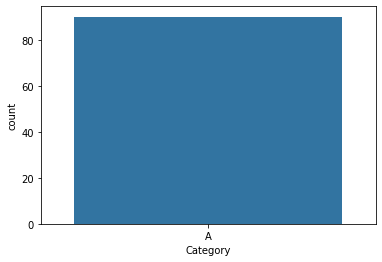

In [263]:
# melihat kolom kategori
sns.countplot(data=data_A1, x='Category')
plt.show()

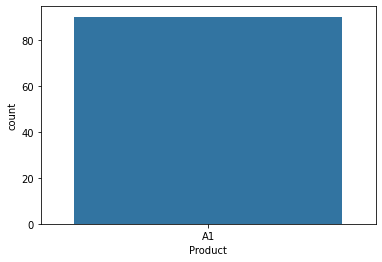

In [264]:
# melihat kolom produk
sns.countplot(data=data_A1, x='Product')
plt.show()

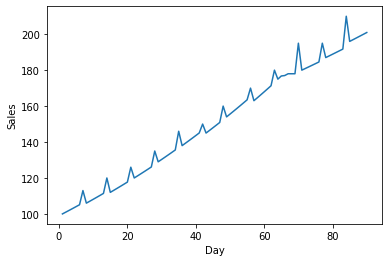

In [265]:
# melihat kolom penjualan

sns.lineplot(data=data_A1, x='Day', y='Sales')
plt.show()

### 3.2. Kategori A2

In [266]:
# menampilkan tabel 5 data teratas
data_A2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


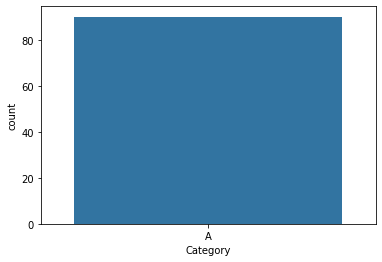

In [267]:
# melihat kolom kategori
sns.countplot(data=data_A2, x='Category')
plt.show()

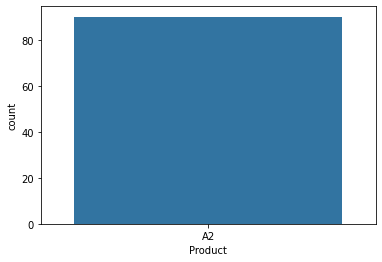

In [268]:
# melihat kolom produk
sns.countplot(data=data_A2, x='Product')
plt.show()

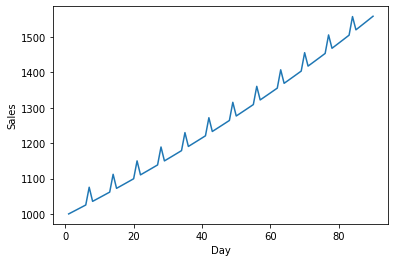

In [269]:
# melihat kolom penjualan
sns.lineplot(data=data_A2, x='Day', y='Sales')
plt.show()

### 3.3. Kategori B1

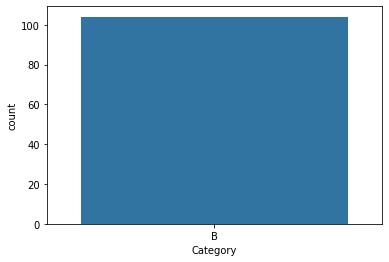

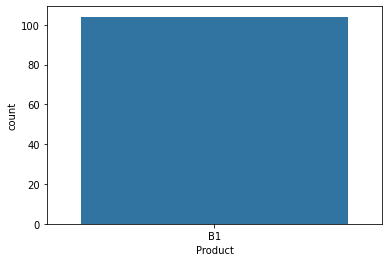

In [270]:
# menampilkan tabel 5 data teratas
data_B1.head()
# melihat kolom kategori
sns.countplot(data=data_B1, x='Category')
plt.show()
# melihat kolom produk
sns.countplot(data=data_B1, x='Product')
plt.show()

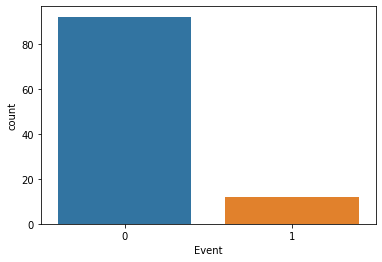

In [271]:
# melihat kolom event
sns.countplot(data=data_B1, x='Event')
plt.show()

In [272]:
# melihat kolom event
data_B1.Event.value_counts()

0    92
1    12
Name: Event, dtype: int64

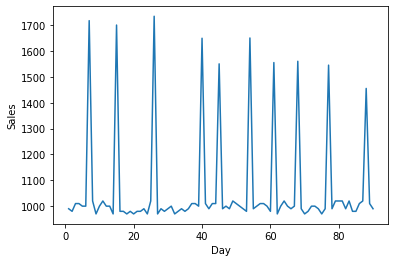

In [273]:
# melihat kolom penjualan
sns.lineplot(data=data_B1, x='Day', y='Sales')
plt.show()

### 3.4. Kategori B2

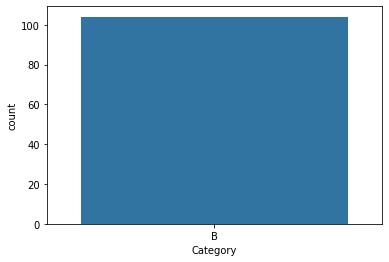

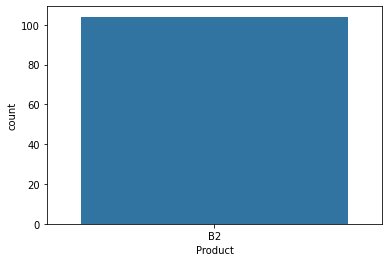

In [274]:
# menampilkan tabel 5 data teratas
data_B2.head()
# melihat kolom kategori
sns.countplot(data=data_B2, x='Category')
plt.show()
# melihat kolom produk
sns.countplot(data=data_B2, x='Product')
plt.show()

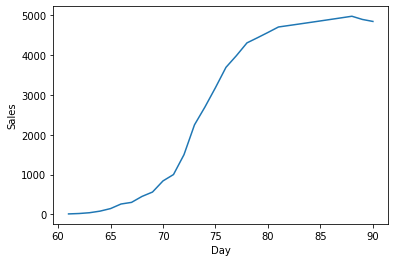

In [275]:
# melihat kolom penjualan
sns.lineplot(data=data_B2, x='Day', y='Sales')
plt.show()

Hasil pengamatan:
- Sales pada data A1 mengalami tren naik dan seasonal setiap kelipatan beberapa hari.
- Sales pada data A2 mengalami tren naik dan seasonal setiap kelipatan beberapa hari.
- Sales pada data B1 menunjukkan data stationary namun ada fluktuasi di hari tertentu kemungkinan di hari adanya event.
- Sales pada data B2 mengalami tren naik.

## 4. Data Preprocessing

### 4.1. Get Data for Model Inference

Data Inferencing adalah data yang akan diprediksi oleh model nanti.

#### 4.1.1. Kategori A1


In [276]:
# melihat data_A1
data_A1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [277]:
# mengambil data sebagian data A1 untuk inferencing
data_A1_infer= data_A1.tail()

# mengeluarkan bagian data tersebut
data_A1 = data_A1.drop(data_A1.tail().index)

# melihat ukuran data untuk inferencing dan data untuk train & test
data_A1_infer.shape, data_A1.shape

((5, 4), (85, 4))

#### 4.2.1. Kategori A2

In [278]:
# mengambil data sebagian data A2 untuk inferencing
data_A2_infer= data_A2.tail()

# mengeluarkan bagian data tersebut
data_A2 = data_A2.drop(data_A2.tail().index)

# melihat ukuran data untuk inferencing dan data untuk train & test
data_A2_infer.shape, data_A2.shape

((5, 4), (85, 4))

#### 4.1.3. Kategori B1

Di bagian data loading Data Scientist melihat adanya missing value pada tabel B1. Model time series membutuhkan data yang berurutan untuk train, test, dan inference tanpa missing value, oleh karena itu Data Scientist akan memeriksa dan melakukan tindakan kepada missing value dahulu sebelum mengambil data inferencing.

In [279]:
# melihat data B1
data_B1.tail()

,Day,Category,Product,Sales,Event
99,100,B,B1,NaN,0
100,101,B,B1,NaN,1
101,102,B,B1,NaN,0
102,103,B,B1,NaN,0
103,104,B,B1,NaN,0


In [280]:
# melihat jumlah null pada data
data_B1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

In [281]:
# mencari index null pada data

np.where(data_B1.Sales.isnull())[0]

array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103])

In [282]:
# mengambil data sebagian data B1 untuk inferencing
data_B1_infer= data_B1.iloc[85:90,:]

# mengeluarkan bagian data tersebut
data_B1 = data_B1.drop(data_B1.iloc[85:,:].index)

# melihat data_B1_infer
data_B1_infer

,Day,Category,Product,Sales,Event
85,86,B,B1,1010.0,0
86,87,B,B1,1020.0,0
87,88,B,B1,1455.0,1
88,89,B,B1,1010.0,0
89,90,B,B1,990.0,0


In [283]:
# melihat data_B1
data_B1.tail()

,Day,Category,Product,Sales,Event
80,81,B,B1,1020.0,0
81,82,B,B1,990.0,0
82,83,B,B1,1020.0,0
83,84,B,B1,980.0,0
84,85,B,B1,980.0,0


In [284]:
# melihat ukuran data untuk inferencing dan data untuk train & test
data_B1_infer.shape, data_B1.shape

((5, 5), (85, 5))

Data Scientist mengambil 5 data untuk inference.

#### 4.1.4. Kategori B2

Di bagian data loading Data Scientist melihat adanya missing value pada tabel B2. Model time series membutuhkan data yang berurutan untuk train, test, dan inference tanpa missval, oleh karena itu Data Scientist akan memeriksa dan melakukan tindakan kepada missing value dahulu sebelum mengambil data inferencing.

In [285]:
# melihat data B2
data_B2

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN
...,...,...,...,...
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN


In [286]:
# melihat jumlah null pada data_B2
data_B2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

In [287]:
# mencari index null pada data

np.where(data_B2.Sales.isnull())[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103])

Data null cukup banyak yaitu 74 dibanding keseluruhan yaitu 104. Data null tersebar di index 0-59 dan index ke 90-103. Missing value akan dihapus dan Data Scientist akan mengambil 5 data untuk inferencing.

In [288]:
# mengambil data sebagian data B2 untuk inferencing
data_B2_infer= data_B2.iloc[85:90,:]

# mengeluarkan bagian data tersebut
data_B2 = data_B2.drop(data_B2.iloc[85:,:].index)
data_B2 = data_B2.drop(data_B2.iloc[:60,:].index)

# melihat data_B2_infer
data_B2_infer

,Day,Category,Product,Sales
85,86,B,B2,4901.913082
86,87,B,B2,4941.128387
87,88,B,B2,4980.657414
88,89,B,B2,4900.000000
89,90,B,B2,4850.000000


In [289]:
# melihat data_B2
data_B2

,Day,Category,Product,Sales
60,61,B,B2,10.000000
61,62,B,B2,20.000000
62,63,B,B2,40.000000
63,64,B,B2,80.000000
64,65,B,B2,144.000000
65,66,B,B2,259.200000
66,67,B,B2,300.000000
67,68,B,B2,450.000000
68,69,B,B2,560.000000
69,70,B,B2,840.000000


### 4.2. Splitting between X & y, train & test

Data Scientist tidak melakukan pemisahan data menjadi X (variabel dependent) dan y (variabel independent) karena data yang digunakan hanya data tanggal dan penjualan. Pada bagian ini Data Scientist memisahkan data menjadi train dan test.

#### 4.2.1. Kategori A1

In [290]:
# melihat jumlah baris per kolom

data_A1.shape, data_A1.shape, data_B1.shape, data_B2.shape

((85, 4), (85, 4), (85, 5), (25, 4))

In [291]:
# split train dan test dari Data A1
data_A1_train = data_A1[0:80]
data_A1_test = data_A1[80:]

# memeriksa ukuran train dan test dari Data A1
print('Train Size: ', data_A1_train.shape)
print('Test Size: ', data_A1_test.shape)

Train Size:  (80, 4)
Test Size:  (5, 4)


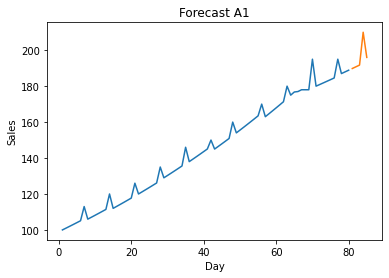

In [307]:
# melihat grafik garis dari Data_A1_train dan Data_A1_test

plt.title(label='Forecast A1')
sns.lineplot(data=data_A1_train, x='Day', y='Sales')
sns.lineplot(data=data_A1_test, x='Day', y='Sales')

plt.show()

#### 4.2.2. Kategori A2

In [309]:
# split train dan test dari Data A2
data_A2_train = data_A2[0:80]
data_A2_test = data_A2[80:]

# memeriksa ukuran train dan test dari Data A2
print('Train Size: ', data_A2_train.shape)
print('Test Size: ', data_A2_test.shape)

Train Size:  (80, 4)
Test Size:  (5, 4)


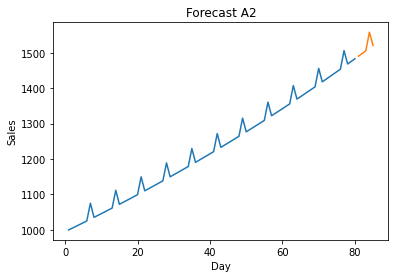

In [311]:
# melihat grafik garis dari Data_A2_train dan Data_A2_test

plt.title(label='Forecast A2')
sns.lineplot(data=data_A2_train, x='Day', y='Sales')
sns.lineplot(data=data_A2_test, x='Day', y='Sales')

plt.show()

#### 4.2.3. Kategori B1

In [312]:
# split train dan test dari Data B1
data_B1_train = data_B1[0:80]
data_B1_test = data_B1[80:]

# memeriksa ukuran train dan test dari Data B1
print('Train Size: ', data_B1_train.shape)
print('Test Size: ', data_B1_test.shape)

Train Size:  (80, 5)
Test Size:  (5, 5)


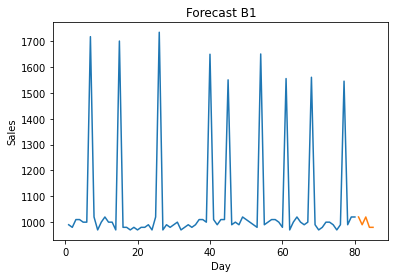

In [314]:
# melihat grafik garis dari Data_B1_train dan Data_B1_test

plt.title(label='Forecast B1')
sns.lineplot(data=data_B1_train, x='Day', y='Sales')
sns.lineplot(data=data_B1_test, x='Day', y='Sales')

plt.show()

#### 4.2.4. Kategori B2

In [231]:
data_B2.shape

(25, 4)

In [315]:
# split train dan test dari Data B2
data_B2_train = data_B2[0:20]
data_B2_test = data_B2[20:]

# memeriksa ukuran train dan test dari Data B2
print('Train Size: ', data_B2_train.shape)
print('Test Size: ', data_B2_test.shape)

Train Size:  (20, 4)
Test Size:  (5, 4)


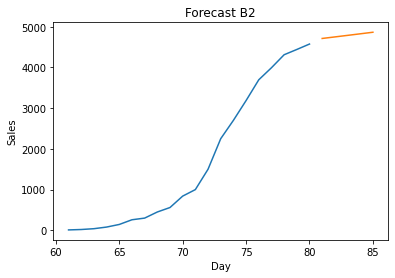

In [316]:
# melihat grafik garis dari Data_B2_train dan Data_B2_test

plt.title(label='Forecast B2')
sns.lineplot(data=data_B2_train, x='Day', y='Sales')
sns.lineplot(data=data_B2_test, x='Day', y='Sales')

plt.show()

### 4.3. Handling Outliers

Outlier adalah data yang berbeda secara signifikan dari data lain dalam sebuah kumpulan data yang dapat mempengaruhi akurasi prediksi. Data timeseries tidak mengandung nilai numerik selain target prediksi sehingga tidak ada handling outlier yang dilakukan oleh Data Scientist.

In [317]:
# fungsi untuk memeriksa outlier

def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df_train[variable].skew())
    if (df_train[variable].skew() >= -0.5 ) | (df_train[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

### 4.4 Handling Missing Values

Handling Missing Value sudah dilakukan sebelum dilakukan splitting data train dan test.

In [351]:
# melihat jumlah missing values Data A1

print('Jumlah null di data_A1_train:')
print(data_A1_train.isnull().sum())
print('')
print('Jumlah null di data_A1_test:')
print(data_A1_test.isnull().sum())
print('')

# mencari index missing pada data A1
print('Index null di data_A1_train:', np.where(data_A1_train.Sales.isnull())[0])
print('')
print('Index null di data_A1_test:', np.where(data_A1_test.Sales.isnull())[0])

Jumlah null di data_A1_train:
Day         0
Category    0
Product     0
Sales       0
dtype: int64

Jumlah null di data_A1_test:
Day         0
Category    0
Product     0
Sales       0
dtype: int64

Index null di data_A1_train: []

Index null di data_A1_test: []


In [320]:
# melihat jumlah missing values Data A2, B1, B2

print(data_A2.isnull().sum())
print('')
print(data_B1.isnull().sum())
print('')
print(data_B2.isnull().sum())

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Day         0
Category    0
Product     0
Sales       0
Event       0
dtype: int64

Day         0
Category    0
Product     0
Sales       0
dtype: int64


### 4.5. Feature Selection

Data Scientist membuang kolom yang tidak terpakai dan menjadikan kolom Day sebagai index.

In [352]:
# melihat data_A1 train
data_A1_train.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [354]:
# data_A1 train & test
data_A1_train = data_A1_train.drop(['Category','Product'], axis=1)
data_A1_train = data_A1_train.set_index('Day')
data_A1_test = data_A1_test.drop(['Category','Product'], axis=1)
data_A1_test = data_A1_test.set_index('Day')

# data_A2 train & test
data_A2_train = data_A2_train.drop(['Category','Product'], axis=1)
data_A2_train = data_A2_train.set_index('Day')
data_A2_test = data_A2_test.drop(['Category','Product'], axis=1)
data_A2_test = data_A2_test.set_index('Day')

# data_B2 train & test
data_B2_train = data_B2_train.drop(['Category','Product'], axis=1)
data_B2_train = data_B2_train.set_index('Day')
data_B2_test = data_B2_test.drop(['Category','Product'], axis=1)
data_B2_test = data_B2_test.set_index('Day')

In [356]:
# data_B1
data_B1_train = data_B1_train.drop(['Category','Product'], axis=1)
data_B1_train = data_B1_train.set_index('Day')
data_B1_test = data_B1_test.drop(['Category','Product'], axis=1)
data_B1_test = data_B1_test.set_index('Day')

In [357]:
# melihat data_A1_train
data_A1_train

,Sales
Day,
1,100.000000
2,101.000000
3,102.010000
4,103.030100
5,104.060401
...,...
76,184.545226
77,195.000000
78,187.000000


In [358]:
# melihat data_A1_test
data_A1_test

,Sales
Day,
81,189.819048
82,190.768144
83,191.721984
84,210.000000
85,196.000000


### 4.6. Split Between Numerical Columns and Categorical Columns

Data terdiri dari tanggal dan target sales sehingga tidak dilakukan pemisahaan kolom numerik dan kategorikal

### 4.7. Feature Scaling and Encoding

Data tidak dipisah secara numerik dan kategorikal sehingga tidak dilakukan feature scaling dan encoding.

## 5. Baseline Model & Evaluation

Pertama Data Scientist memeriksa Stationary Data menggunakan ADF Test:

In [359]:
# memeriksa stationary data dengan ADF test

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):         # CV yang digunakan adalah 5% kalau P-val <= CV (0.05) dan ADF Statistic < nilai dari cv 5%, maka data == Data Stationary
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [362]:
# CV yang digunakan adalah 5% kalau P-val <= CV (0.05) dan ADF Statistic < nilai dari cv 5%, maka data == Data Stationary

In [363]:
# memeriksa stationary data_A1
check_stationarity(data_A1_train)

ADF Statistic: -0.333864
p-value: 0.920569
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
Non-stationary


In [361]:
# memeriksa stationary data_A2 
check_stationarity(data_A2_train)

ADF Statistic: 156841635145592.187500
p-value: 1.000000
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589
Non-stationary


In [365]:
# memeriksa stationary data_B2 
check_stationarity(data_B2_train)

ADF Statistic: -0.564647
p-value: 0.878772
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661
Non-stationary


In [366]:
# memeriksa stationary data_B1 
check_stationarity(data_B1_train['Sales'])

ADF Statistic: -9.985151
p-value: 0.000000
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587
Stationary


In [ ]:
# memeriksa seasonality data A1
data_A1_train.Sales.to_list()

In [410]:
# memeriksa seasonality data A2
data_A2_train.Sales.to_list()

[1000.0,
 1004.9999999999999,
 1010.0249999999997,
 1015.0751249999996,
 1020.1505006249995,
 1025.2512531281243,
 1075.3775093937647,
 1035.5293969407335,
 1040.7070439254371,
 1045.9105791450643,
 1051.1401320407895,
 1056.3958327009932,
 1061.6778118644982,
 1111.9862009238204,
 1072.3211319284394,
 1077.6827375880814,
 1083.0711512760217,
 1088.4865070324017,
 1093.9289395675637,
 1099.3985842654015,
 1149.8955771867284,
 1110.4200550726619,
 1115.9721553480251,
 1121.552016124765,
 1127.1597762053887,
 1132.7955750864155,
 1138.4595529618475,
 1189.1518507266567,
 1149.8726099802898,
 1155.6219730301912,
 1161.400082895342,
 1167.2070833098185,
 1173.0431187263675,
 1178.9083343199993,
 1229.8028759915992,
 1190.7268903715571,
 1196.6805248234148,
 1202.6639274475317,
 1208.6772470847693,
 1214.720633320193,
 1220.7942364867938,
 1271.8982076692278,
 1233.0326987075737,
 1239.1978622011113,
 1245.3938515121167,
 1251.6208207696773,
 1257.8789248735254,
 1264.168319497893,
 1315.48

Berdasarkan pemeriksaan stationary data diketahui:
- Data A1, A2, B2 merupakan data non-stationary, oleh karena itu Data Scientist akan mencoba menggunakan model SES, Holt Linear Trend, Holt-Winters, ARIMA, dan SARIMA.
- Data B1 merupakan data stationary, oleh karena itu Data Scientist akan mencoba menggunakan Naive Approach, Simple Average, Moving Average, Autoregressive Model, dan ARMA.

### 5.1. Kategori A1

In [368]:
# melihat data A1 train

data_A1_train.head()

,Sales
Day,
1,100.000000
2,101.000000
3,102.010000
4,103.030100
5,104.060401


mae : 7.075242280214473
rmse : 10.291757788779295


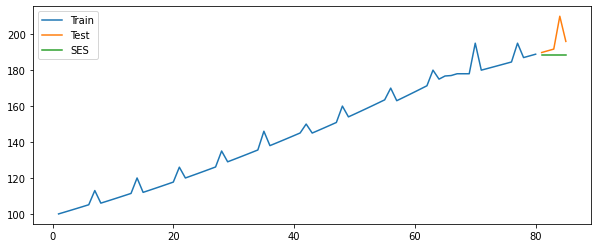

In [390]:
# model SES
y_hat_avg = data_A1_test.copy()
fit1 = SimpleExpSmoothing(np.asarray(data_A1_train)).fit()        # np.asarray # level smoothing atau alpha 0.6  # optimized = False
y_hat_avg['SES'] = fit1.forecast(len(data_A1_test))

# evaluation
print("mae :", mean_absolute_error(data_A1_test, y_hat_avg.SES))
print("rmse :", sqrt(mean_squared_error(data_A1_test, y_hat_avg.SES)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_A1_train, label='Train')
plt.plot(data_A1_test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

mae : 4.19348156555044
rmse : 7.328167917755214


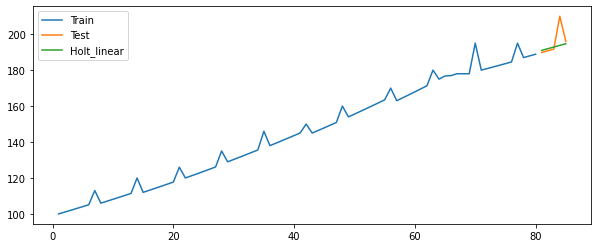

In [408]:
# model HLT
y_hat_avg = data_A1_test.copy()
fit1 = Holt(np.asarray(data_A1_train)).fit(smoothing_level = 0.3,smoothing_slope = 0.1) # smoothing level = alpha = atur sendiri # smoothing slope = kemiringan tren = atur sendiri
y_hat_avg['Holt_linear'] = fit1.forecast(len(data_A1_test))

# evaluation
print("mae :", mean_absolute_error(data_A1_test, y_hat_avg.Holt_linear))
print("rmse :", sqrt(mean_squared_error(data_A1_test, y_hat_avg.Holt_linear)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_A1_train, label='Train')
plt.plot(data_A1_test, label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

mae : 2.338857499211474
rmse : 3.6684676187475973


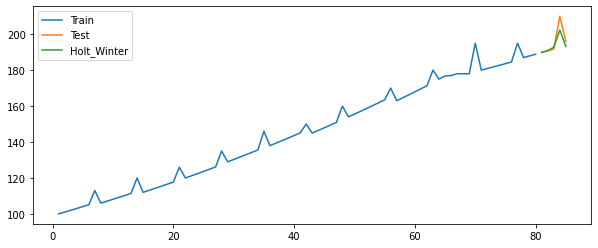

In [406]:
# model HW
y_hat_avg = data_A1_test.copy()
fit1 = ExponentialSmoothing(np.asarray(data_A1_train) ,seasonal_periods=7 ,trend='additive', seasonal='multiplicative').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(data_A1_test))

# evaluation
print("mae :", mean_absolute_error(data_A1_test, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(data_A1_test, y_hat_avg.Holt_Winter)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_A1_train, label='Train')
plt.plot(data_A1_test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# seasonal period - bisa diatur dan dicocokkan
# trend - bisa additive dan multiplicative - dicocokan yang paling pas - perubahan additive tidak sebesar multiplicative
# seasonal - bisa additive dan multiplicative - dicocokan yang paling pas

In [ ]:
# model ARIMA

# model SARIMA


### 5.2. Kategori A2

mae : 34.35163690219633
rmse : 41.851757801588626


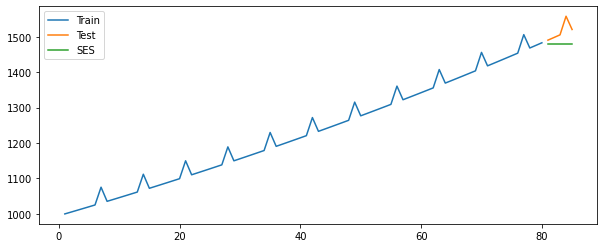

In [411]:
# model SES
y_hat_avg = data_A2_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(data_A2_train)).fit()        # np.asarray # level smoothing atau alpha 0.6  # optimized = False
y_hat_avg['SES'] = fit2.forecast(len(data_A2_test))

# evaluation
print("mae :", mean_absolute_error(data_A2_test, y_hat_avg.SES))
print("rmse :", sqrt(mean_squared_error(data_A2_test, y_hat_avg.SES)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_A2_train, label='Train')
plt.plot(data_A2_test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

mae : 10.971075908217381
rmse : 19.299853330062646


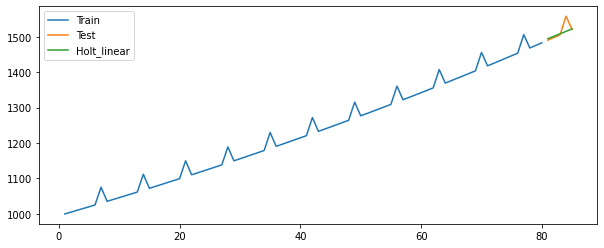

In [412]:
# model HLT
y_hat_avg = data_A2_test.copy()
fit2 = Holt(np.asarray(data_A2_train)).fit(smoothing_level = 0.3,smoothing_slope = 0.1) # smoothing level = alpha = atur sendiri # smoothing slope = kemiringan tren = atur sendiri
y_hat_avg['Holt_linear'] = fit2.forecast(len(data_A2_test))

# evaluation
print("mae :", mean_absolute_error(data_A2_test, y_hat_avg.Holt_linear))
print("rmse :", sqrt(mean_squared_error(data_A2_test, y_hat_avg.Holt_linear)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_A2_train, label='Train')
plt.plot(data_A2_test, label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
# memeriksa seasonality data A2
data_A2_train.Sales.to_list()

mae : 0.2637146679979196
rmse : 0.3245629835914366


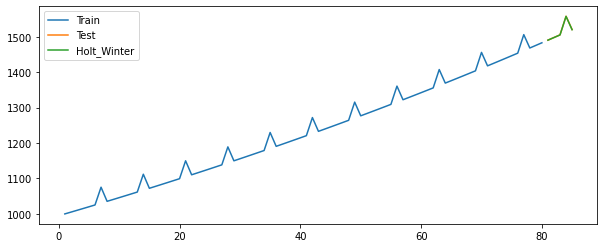

In [423]:
# model HW
y_hat_avg = data_A2_test.copy()
fit2 = ExponentialSmoothing(np.asarray(data_A2_train) ,seasonal_periods=7 ,trend='additive', seasonal='additive').fit()
y_hat_avg['Holt_Winter'] = fit2.forecast(len(data_A2_test))

# evaluation
print("mae :", mean_absolute_error(data_A2_test, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(data_A2_test, y_hat_avg.Holt_Winter)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_A2_train, label='Train')
plt.plot(data_A2_test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# seasonal period - bisa diatur dan dicocokkan
# trend - bisa additive dan multiplicative - dicocokan yang paling pas - perubahan additive tidak sebesar multiplicative
# seasonal - bisa additive dan multiplicative - dicocokan yang paling pas

### 5.3. Kategori B1

### 5.4. Kategori B2

mae : 213.83967640254687
rmse : 220.5368220011076


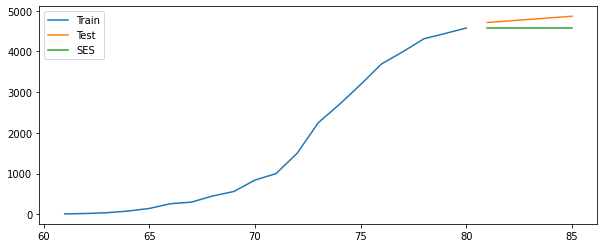

In [426]:
# model SES
y_hat_avg = data_B2_test.copy()
fit4 = SimpleExpSmoothing(np.asarray(data_B2_train)).fit()        # np.asarray # level smoothing atau alpha 0.6  # optimized = False
y_hat_avg['SES'] = fit4.forecast(len(data_B2_test))

# evaluation
print("mae :", mean_absolute_error(data_B2_test, y_hat_avg.SES))
print("rmse :", sqrt(mean_squared_error(data_B2_test, y_hat_avg.SES)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_B2_train, label='Train')
plt.plot(data_B2_test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

mae : 764.2540489710633
rmse : 853.5394754181848


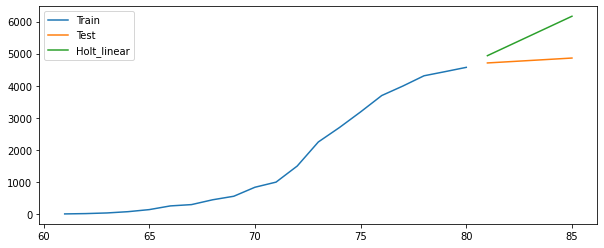

In [430]:
# model HLT
y_hat_avg = data_B2_test.copy()
fit4 = Holt(np.asarray(data_B2_train)).fit(smoothing_level = 0.3,smoothing_slope = 0.1) # smoothing level = alpha = atur sendiri # smoothing slope = kemiringan tren = atur sendiri
y_hat_avg['Holt_linear'] = fit4.forecast(len(data_B2_test))

# evaluation
print("mae :", mean_absolute_error(data_B2_test, y_hat_avg.Holt_linear))
print("rmse :", sqrt(mean_squared_error(data_B2_test, y_hat_avg.Holt_linear)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_B2_train, label='Train')
plt.plot(data_B2_test, label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

mae : 99.51312072702731
rmse : 100.16915959716002


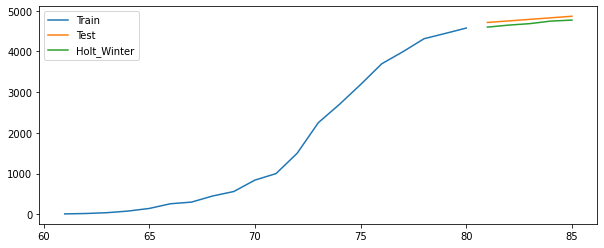

In [431]:
# model HW
y_hat_avg = data_B2_test.copy()
fit4 = ExponentialSmoothing(np.asarray(data_B2_train) ,seasonal_periods=7 ,trend='additive', seasonal='additive').fit()
y_hat_avg['Holt_Winter'] = fit4.forecast(len(data_B2_test))

# evaluation
print("mae :", mean_absolute_error(data_B2_test, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(data_B2_test, y_hat_avg.Holt_Winter)))

# gambar prediksi model
plt.figure(figsize=(10,4))
plt.plot(data_B2_train, label='Train')
plt.plot(data_B2_test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# seasonal period - bisa diatur dan dicocokkan
# trend - bisa additive dan multiplicative - dicocokan yang paling pas - perubahan additive tidak sebesar multiplicative
# seasonal - bisa additive dan multiplicative - dicocokan yang paling pas

## 6. Model Improvement & Evaluation & Saving

### 6.1. Kategori A1

Berdasarkan Baseline Model, Data Scientist memilih model _____. Terhadap model _____ akan dilakukan peningkatan menggunakan gridsearchCV.

In [ ]:
# gridsearch

# tunning

# evaluation

Model mengalami penurunan MAE dan RMSE menjadi ____

In [ ]:
# model saving

MAE dan RMSE dari model cukup baik namun ___ harapan Data Scientist

### 6.2. Kategori A2

### 6.3. Kategori B1

### 6.4. Kategori B2

## 7. Model Inference & Deployment

# Conclusion/Overall Analysis

Berdasarkan exploratory, Data Scientist menemukan bahwa

Kebutuhan perusahaan

Penulis menemukan bahwa data_A1, A2, B1, B2 merupakan data

Penulis menggunakan model

Penulis menggunakan model _ dengan akurasi 